#### Principal Component Analysis Demos

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import make_blobs
from Principal_Component_Analysis import PrincipalComponentAnalysis, create_pca_animation, plot_transformed_data

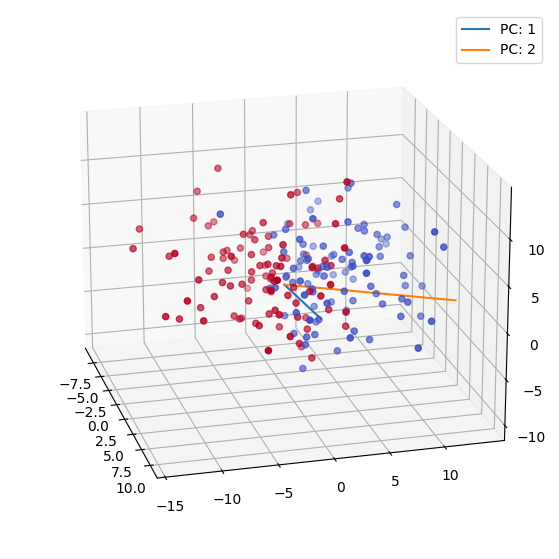

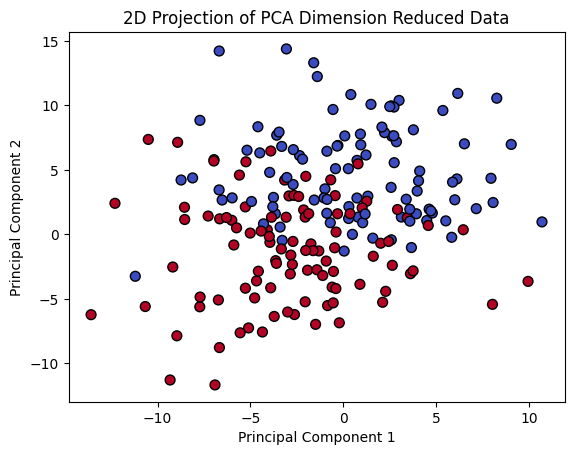

In [2]:
# Create dataset
X, y = make_blobs(n_samples=200, n_features=3, centers=2,
                  cluster_std=4, random_state=0)

# Apply PCA to the dataset
pca = PrincipalComponentAnalysis(variance_threshold=0.6)
transform_X = pca.fit_transform(X)

# Call the animation function
create_pca_animation(X, y, pca)

# Plot transformed data
plot_transformed_data(transform_X, y)

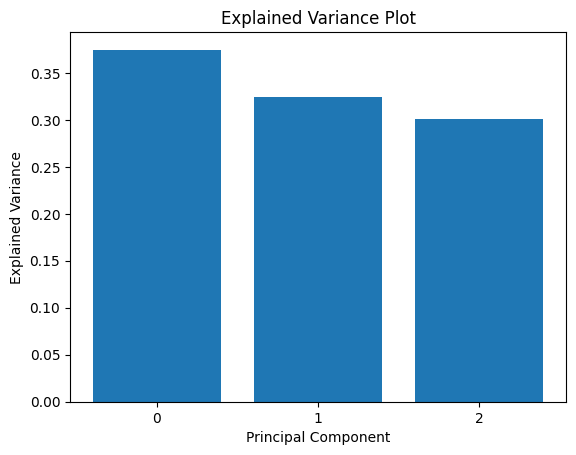

In [3]:
# Plot Explained Variances
explained_variance = pca.explained_variance
plt.bar(range(len(explained_variance)), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance Plot')
plt.xticks([0, 1, 2], ['0', '1', '2'])
plt.show()

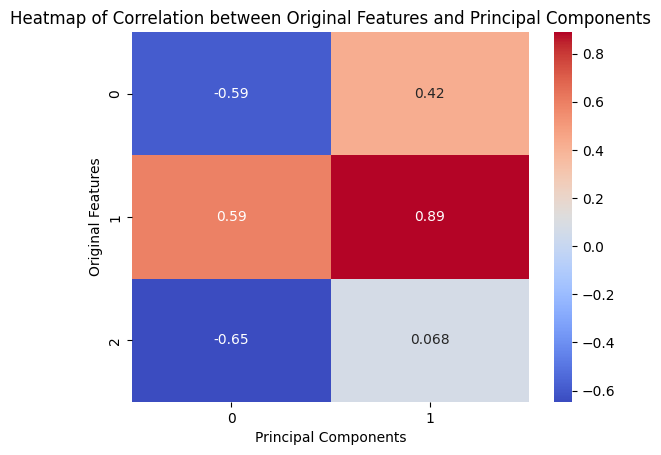

In [4]:
# Initialize the correlation matrix with zeros
correlation_matrix = np.zeros((X.shape[1], transform_X.shape[1]))

# Fill the matrix with computed correlations
for i in range(transform_X.shape[1]):
    for j in range(X.shape[1]):
        correlation_matrix[j, i] = np.corrcoef(X[:, j], transform_X[:, i])[0, 1]

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.xlabel('Principal Components')
plt.ylabel('Original Features')
plt.title('Heatmap of Correlation between Original Features and Principal Components')
plt.show()